In [1]:
import pandas as pd
import numpy as np
import scipy
import scipy.stats
from scipy import stats

In [2]:
df = pd.read_csv('bicicletas-compartidas.csv')

In [3]:
df.columns

Index(['fecha', 'bicis-compartidas', 'temp-obs', 'sens-temp', 'hum', 'viento',
       'codigo-clima', 'festivo', 'findesemana', 'cuartil-ano'],
      dtype='object')

In [4]:
# Variable categorica 
ycat = df['cuartil-ano']
ycat = ycat.apply(lambda x: 'Cat-' + str(int(x)))
ycat.head()

0    Cat-3
1    Cat-3
2    Cat-3
3    Cat-3
4    Cat-3
Name: cuartil-ano, dtype: object

In [5]:
valores, conteo_freq = np.unique(ycat, return_counts = True)
valores, conteo_freq
tabla_frecuencias = dict(zip(valores, conteo_freq))
tabla_frecuencias

{'Cat-0': 4394, 'Cat-1': 4387, 'Cat-2': 4303, 'Cat-3': 4330}

In [6]:
ycat.value_counts()   #Forma más simple de hacerlo 

Cat-0    4394
Cat-1    4387
Cat-3    4330
Cat-2    4303
Name: cuartil-ano, dtype: int64

In [7]:
# variable numerica
ynum = df['viento'].copy()
np.min(ynum), np.max(ynum)

(0.0, 56.5)

In [8]:
np.percentile(ynum, q=100)

56.5

In [9]:
np.percentile(ynum, q=0)

0.0

In [10]:
np.percentile(ynum, q=50)

15.0

In [11]:
np.median(ynum)

15.0

In [12]:
valores =  [0,25,50,75,100]              #Calcular Cuartiles
np.percentile( ynum, q = valores)

array([ 0. , 10. , 15. , 20.5, 56.5])

In [13]:
valores =  [0,20,40,60, 80,100]             # Calcular Quintiles
np.percentile( ynum, q = valores)

array([ 0. ,  9. , 13. , 17. , 22. , 56.5])

In [14]:
valores = list(range(0,110,10))          #Calcular Deciles 
np.percentile( ynum, q = valores)

array([ 0. ,  6.5,  9. , 11. , 13. , 15. , 17. , 19.5, 22. , 27. , 56.5])

In [15]:
y = df['bicis-compartidas']
y.describe()

count    17414.000000
mean      1143.101642
std       1085.108068
min          0.000000
25%        257.000000
50%        844.000000
75%       1671.750000
max       7860.000000
Name: bicis-compartidas, dtype: float64

In [16]:
ynum.describe()

count    17414.000000
mean        15.913063
std          7.894570
min          0.000000
25%         10.000000
50%         15.000000
75%         20.500000
max         56.500000
Name: viento, dtype: float64

In [17]:
#outlier ( Valor atípico) Todo valor que caiga fuera del rango sera considerado un outlier
Q1 = np.percentile( ynum, q = 25)
Q3 = np.percentile( ynum, q = 75)
RI = Q3-Q1

lim_inf = Q1-1.5*RI
lim_sup = Q3+1.5*RI

[lim_inf,lim_sup]

[-5.75, 36.25]

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

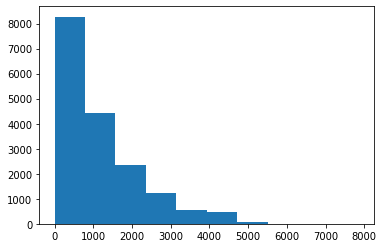

In [19]:
plt.hist(y);

In [20]:
y.value_counts()       #Valores que mas se repiten 

46      46
53      39
70      36
33      36
120     36
        ..
3590     1
1559     1
3670     1
3718     1
0        1
Name: bicis-compartidas, Length: 3781, dtype: int64